# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
#Reading twitter archive data
tw_arch = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Reading image prediction data hosted on server
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', 
                 auth=('599fd2ad_image-predictions', 'image-predictions.tsv'))
r.status_code

200

In [5]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [6]:
with open('image_prediction.tsv',mode='wb')as file:
    file.write(r.content)

In [7]:
image_pred= pd.read_csv('image_prediction.tsv',delimiter='\t')

In [8]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


In [10]:
# Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame 
#Twitter only allows scraping of data from last 7 days
add_data = pd.DataFrame (columns=['tweet_id', 'retweet_count', 'favorite_count']) 
with open('tweet-json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count'] 
        favorite_count = status['favorite_count']
        add_data= add_data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                   columns=['tweet_id', 'retweet_count', \
                                   'favorite_count']))
add_data = add_data.reset_index (drop=True)


In [11]:
add_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, we detect and document quality issues and tidiness issues in our dataset. We use both visual assessment and programmatic assessement to assess the data.

In [12]:
#Programmatic Assessment
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#Visual Assessment
tw_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet BeBe. She rocks the messy bun of your dre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,None,None,None,None
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None,None,None,None
570,801854953262350336,8.018543e+17,11856342.0,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
955,751598357617971201,NaN,NaN,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,None,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
1531,690015576308211712,NaN,NaN,2016-01-21 03:38:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper can only sleep on shoes. It's a cr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,pupper,None
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,None,None,pupper,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
544,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Major. He put on a tie for his first r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805932879...,12,10,Major,None,None,None,None
1160,724004602748780546,NaN,NaN,2016-04-23 22:38:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luther. He saw a ghost. Spooked af. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724004602...,11,10,Luther,None,None,pupper,None


In [14]:
#Visual Assessment
tw_arch.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
269,841320156043304961,NaN,NaN,2017-03-13 16:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We don't rate penguins, but if we did, this on...",NaN,NaN,NaN,https://twitter.com/abc/status/841311395547250688,12,10,None,None,None,None,None
1656,683357973142474752,NaN,NaN,2016-01-02 18:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683357973...,10,10,None,None,None,None,None
2273,667470559035432960,NaN,NaN,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667470559...,11,10,a,None,None,None,None
696,786664955043049472,NaN,NaN,2016-10-13 20:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Honestly Kathleen I just want more Ken Bone"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786664955...,12,10,None,None,None,None,None
210,852189679701164033,NaN,NaN,2017-04-12 16:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailor. He has collected the best dirt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852189679...,12,10,Sailor,None,None,None,None
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,NaN,NaN,NaN,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None
380,827600520311402496,NaN,NaN,2017-02-03 19:31:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tucker. It's his birthday. He's pupset wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827600520...,13,10,Tucker,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None


In [15]:
#Programmatic Assessment
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#Visual Assessment
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,0.100452,True
1012,709519240576036864,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,cocker_spaniel,0.414982,True,Newfoundland,0.225482,True,flat-coated_retriever,0.196789,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True
129,668286279830867968,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,1,golden_retriever,0.215944,True,basset,0.189214,True,Cardigan,0.113010,True
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,geyser,0.991273,False,volcano,0.004673,False,fountain,0.001234,False
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True


In [17]:
#Programmatic Assessment
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [18]:
#Visual Assessment
add_data.sample(10)

,tweet_id,retweet_count,favorite_count
1751,678800283649069056,1018,2810
2209,668614819948453888,341,654
2276,667435689202614272,89,326
530,808106460588765185,2525,9701
110,871032628920680449,3999,23255
440,819711362133872643,3604,14916
1447,696100768806522880,750,2125
1231,712809025985978368,7602,20378
142,864197398364647424,9616,31459
127,867774946302451713,7788,35179


### Quality issues
#### For twitter archive data(tw_arch)
1. Completeness - Missing values of dog names and stages.

2. Completeness- Missing expanded url values.

3. Validity- timestamp, retweeted_status_timestamp should be datetime instead of string.

4. Validity- tweet_id is integer instead of string

5. Accuracy- invalid dog names(all,one,the,a) in some rows

6. Consistency- Removing tweet_ids which are retweets

7. Completeness-  in_reply_to_status_id	in_reply_to_user_id , retweeted_status_id	retweeted_status_user_id variables not essential to our analysis

#### For Image prediction(image_pred)
8. Validity- tweet_id should be string instead of integer.

#### For additonal twitter data(add_data)

9. Accuracy - Although the retweet_count is not zero, favorite_count(number of likes for a tweet) is zero in some rows which is an unlikely scenario for a tweet. 

### Tidiness issues
1. Each variable forms a column- All columns dogger,floofer,pupper,puppo must be converted into a single attribute as they all represent a dog stage.

2. Each type of observational unit forms a table - We need to merge all 3 tables to get useful insights(all duplicatedcolumns must be removed)

## Cleaning Data
In this section, we clean all of the issues we documented while assessing. 

In [19]:
# Make copies of original pieces of data
tw_arch1 = tw_arch.copy()
image_pred1 = image_pred.copy()
add_data1 = add_data.copy()

### Quality issues

### Issue #1: Completeness - Missing values of dog names and stages.

#### Define: 
We have no way to know the real values of missing dog names and stages hence we would replace the missing dog names with null values.

#### Code

In [20]:
#Replacing Missing dog names with null values
tw_arch1['name'] = tw_arch1['name'].replace({'None' : np.nan})

#### Test

In [21]:
#Checking the results
tw_arch1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
241,846505985330044928,NaN,NaN,2017-03-27 23:35:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,NaN,NaN,NaN,https://twitter.com/shomaristone/status/846484...,11,10,NaN,None,None,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2101,670691627984359425,NaN,NaN,2015-11-28 19:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ester. He has a cocaine problem. This ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670691627...,8,10,Ester,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
769,777189768882946048,NaN,NaN,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777189768...,12,10,Jeffrey,None,None,None,None
2003,672475084225949696,NaN,NaN,2015-12-03 17:58:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672475084...,8,10,Buddy,None,None,None,None
1355,703611486317502464,NaN,NaN,2016-02-27 16:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's experiencing the pupper equ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703611486...,10,10,Scooter,None,None,pupper,None


### Issue #2: Completeness- Missing expanded url values.

#### Define
Some of the tweets dont have the expanded url so there is no way to trace it back to the original tweet if we want to see it.
Hence we will choose to remove the rows with these values.

#### Code

In [22]:
#Checking the number of null values
tw_arch1['expanded_urls'].isna().sum()

59

In [23]:
#Removing 59 rows with null values
tw_arch1.dropna(subset= ['expanded_urls'],inplace=True)

#### Test

In [24]:
#Checking the results
tw_arch1['expanded_urls'].isna().sum()

0

### Issue #3: Validity- timestamp, retweeted_status_timestamp is string.

#### Define
We convert the above time related attributes into datetime datatype from string

#### Code

In [25]:
#Coversion from string to datetime
tw_arch1['timestamp']= pd.to_datetime(tw_arch1['timestamp'])

In [26]:
tw_arch1['retweeted_status_timestamp']= pd.to_datetime(tw_arch1['retweeted_status_timestamp'])

#### Test

In [27]:
tw_arch1['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [28]:
tw_arch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          1611 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime

### Issue #4 : Validity- tweet_id is integer

#### Define
We need to convert all the id to string datatype from integer as that would be more valid to the defined schema.

#### Code

In [29]:
#Coversion from float to string
tw_arch1= tw_arch1.astype({'tweet_id': str})

#### Test

In [30]:
tw_arch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          1611 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetim

### Issue #5: Accuracy- invalid dog names(all,one,the,a) in some rows

#### Define
We will replace the invalid dog names(all, my, not, a, an, the, by, such) with null values

#### Code

In [31]:
# We can also Create a dictionary of invalid dog names programmatically
#All invalid dog names are in lowercase
#Must do this before replacing with null values in Task 1
#mask = tw_arch1.name.str.islower() 
#column_name = 'name' 
#tw_arch1.loc[mask, column_name] = np.nan

In [32]:
#Replacing them with null
tw_arch1['name'] = tw_arch1['name'].replace({'all': np.nan,'my': np.nan,
                                             'not': np.nan,'a': np.nan,'an': np.nan,'the': np.nan,
                                             'by': np.nan, 'such' : np.nan})

#### Test

In [33]:
#No invalid values
tw_arch1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle',

### Issue #6: Consistency- Removing retweeted tweet_ids

#### Define
We only need the original tweets hence we will remove the tweet_ids which are retweets.

#### Code

In [34]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
tw_arch1 = tw_arch1[pd.isnull(tw_arch1['retweeted_status_user_id'])]

#### Test

In [35]:
tw_arch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1420 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns

### Issue #7: Completeness-   Dropping columns not essential to our analysis

#### Define
in_reply_to_status_id	in_reply_to_user_id , retweeted_status_id	retweeted_status_user_id variables are not essential to our analysis hence we would drop those attributes.

#### Code

In [36]:
tw_arch1= tw_arch1.drop(['in_reply_to_status_id', 'in_reply_to_user_id' ,
                         'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [37]:
tw_arch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1420 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 215.0+ KB


### Issue #8: Validity- tweet_id should is integer in image_pred.

#### Define
We need to convert tweet_id into a string datatype from integer in image_pred.

#### Code

In [38]:
image_pred1 = image_pred1.astype({'tweet_id':str})

#### Test

In [39]:
image_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9: Accuracy - Although the retweet_count is not zero, favorite_count(number of likes for a tweet) is zero in some rows 

#### Define
This is an unlikely scenario for a tweet and hence is treated as an inaccurate piece of information. So we will replace those with null values.

#### Code

In [40]:
add_data1['favorite_count'] = add_data1['favorite_count'].replace({'0': np.nan})

In [41]:
add_data1['favorite_count'] = add_data1['favorite_count'].replace({0: np.nan})

#### Test

In [42]:
add_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2175 non-null float64
dtypes: float64(1), object(2)
memory usage: 55.2+ KB


In [43]:
add_data1['favorite_count'].isna().sum()

179

In [44]:
add_data1['favorite_count'].sample(10)

1180     3818.0
244     31737.0
2186     1386.0
933      6384.0
1630     2169.0
734     10895.0
965       758.0
205     15939.0
997     15549.0
253     17871.0
Name: favorite_count, dtype: float64

## Tidiness Issues
### Issue #1: Each variable forms a column


#### Define
All columns dogger,floofer,pupper,puppo must be converted into a single attribute as they all represent a dog stage.

#### Code

In [45]:
#Combining all headers into one
tw_arch1['all_stages'] = tw_arch1.doggo + tw_arch1.floofer + tw_arch1.pupper + tw_arch1.puppo

In [46]:
#Some tweets have multiple dog stages
tw_arch1.all_stages.value_counts()

NoneNoneNoneNone        1779
NoneNonepupperNone       222
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: all_stages, dtype: int64

In [47]:
# create function to make a single column for dog stages
def check_stages(archive):
    if archive['all_stages'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['all_stages'].count('doggo') == 1:
            return 'Doggo'
        elif archive['all_stages'].count('floofer') == 1:
            return 'Floofer'
        elif archive['all_stages'].count('pupper') == 1:
            return 'Pupper'
        elif archive['all_stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return np.nan

tw_arch1['dog_stage'] = tw_arch1.apply(check_stages, axis=1)

In [48]:
#Dropping unused columns
tw_arch1.drop(['doggo','floofer','pupper','puppo','all_stages'],axis=1, inplace=True)

#### Test

In [49]:
tw_arch1.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1018,746818907684614144,2016-06-25 21:34:37,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,https://twitter.com/dog_rates/status/746818907...,13,10,NaN,NaN
994,748568946752774144,2016-06-30 17:28:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,NaN
2283,667200525029539841,2015-11-19 04:39:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,NaN
374,828372645993398273,2017-02-05 22:40:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexander Hamilpup. He was one of the ...,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,NaN
172,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,Doggo
1049,743222593470234624,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,NaN,Pupper
1195,717421804990701568,2016-04-05 18:41:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,NaN
1187,718460005985447936,2016-04-08 15:26:28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,9,10,Bowie,NaN
645,793165685325201412,2016-10-31 19:00:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,NaN
1899,674670581682434048,2015-12-09 19:22:56,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,https://twitter.com/dog_rates/status/674670581...,9,10,Jeb,NaN


In [50]:
tw_arch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1420 non-null object
dog_stage             338 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.4+ KB


### Issue #2: Each type of observational unit forms a table 

#### Define
We need to merge all 3 tables to get useful insights(all duplicatedcolumns must be removed)

#### Code

In [51]:
#Creating a copy of twitter archive data since we will be merging our image_pred1 and add_data1 tables into one
tw_arch2 = tw_arch1.copy() 

In [52]:
#merge the two tables
tw_arch2 = pd.merge(left=tw_arch2, right=add_data1, how='left', on='tweet_id')
tw_arch2 = pd.merge(left=tw_arch2, right=image_pred1, how='left', on='tweet_id')

In [53]:
tw_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1420 non-null object
dog_stage             338 non-null object
retweet_count         2117 non-null object
favorite_count        2117 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               19

In [54]:
#dropping rows with no image prediction values
tw_arch2 = tw_arch2[tw_arch2['img_num'].notna()]

#### Test

In [55]:
tw_arch2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [56]:
tw_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1375 non-null object
dog_stage             306 non-null object
retweet_count         1994 non-null object
favorite_count        1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               19

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
tw_arch2.to_csv('twitter_archive_master.csv',index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Q1: What are the most common dog names?

In [59]:
#Since there are lots of different names we choose the top 10 dog names from our dataset
d_name = tw_arch2.name.value_counts()[1:11]

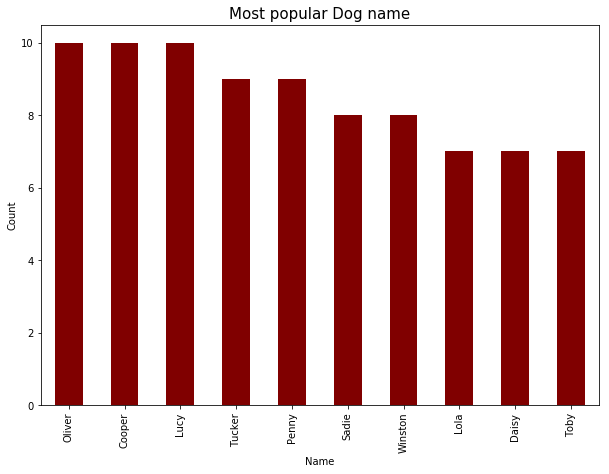

In [60]:
#Plotting a bar chart with appropriate labels

bar = d_name.plot.bar(color = 'Maroon', fontsize= 10)
bar.figure.set_size_inches(10, 7);

plt.title('Most popular Dog name', color = 'black', fontsize = '15')
plt.xlabel('Name', color = 'black', fontsize = '10')
plt.ylabel('Count', color = 'black', fontsize = '10');

#### Q2: What is the trend of number of likes and retweets in a tweet?

In [61]:
#Subset of number of likes/retweets over a time period
likes = tw_arch2[['favorite_count','retweet_count','timestamp']]

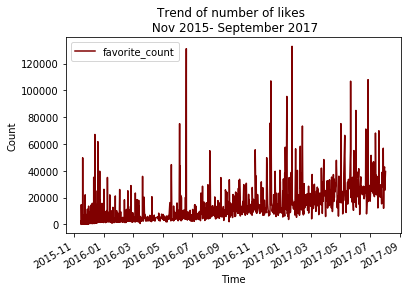

In [62]:
#Plotting a line chart with appropriate labels

lines = likes.plot.line(x='timestamp', y='favorite_count', linestyle ='solid', color= 'maroon')
plt.title('Trend of number of likes \n Nov 2015- September 2017', color = 'black', fontsize = '12')
plt.xlabel('Time', color = 'black', fontsize = '10')
plt.ylabel('Count', color = 'black', fontsize = '10');

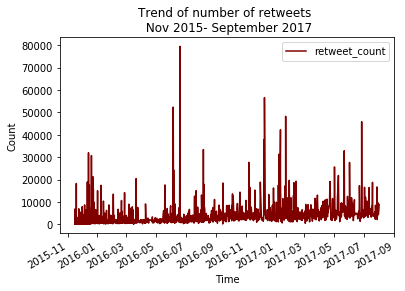

In [63]:
#Plotting a line chart with appropriate labels

lines = likes.plot.line(x='timestamp', y='retweet_count', linestyle ='solid', color= 'maroon')
plt.title('Trend of number of retweets \n Nov 2015- September 2017', color = 'black', fontsize = '12')
plt.xlabel('Time', color = 'black', fontsize = '10')
plt.ylabel('Count', color = 'black', fontsize = '10');

#### Q3: What is the average number of likes and retweets for a tweet?

In [64]:
tw_arch2.describe()

,rating_numerator,rating_denominator,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,12.280843,10.532096,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,41.497718,7.320710,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,0.000000,2.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,11.000000,10.000000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,12.000000,10.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,1776.000000,170.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [65]:
tw_arch2.mean()

tweet_id                      inf
rating_numerator        12.280843
rating_denominator      10.532096
retweet_count         2766.753260
favorite_count        8895.725677
img_num                  1.203109
p1_conf                  0.593941
p1_dog                   0.740722
p2_conf                  0.134419
p2_dog                   0.749749
p3_conf                  0.060248
p3_dog                   0.725176
dtype: float64

#### Q4: What is the most viral tweet?

In [66]:
tw_arch2[tw_arch2['favorite_count']== 132810]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
327,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,Puppo,48265,...,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


### Insights:
1. Lucy, Oliver and Cooper are the most common dog names. Each was named 10 times in this dataset.

2. Number of likes and retweets have increased on an average over the last 2 years

3. Average number of likes and retweets in a tweet by Weratedogs were 8896 and 2767 respectively.

4. The most viral tweet got 132,810 likes and was a post about a supportive puppo getting a 13/10 rating.